# Adult HIV Prevalence Rate

## Data Set Information:

Based on 2014 Kenya's HIV/AIDS profile data by County This assesses the HIV/AIDS situation in Kenya's 47 counties with regards to adults and children living with the disease, new infections, gender specific infection rates, homes with orphans and their financial situation. The dataset is available for download at [Adult HIV prevalence rate in Kenya](https://data.humdata.org/dataset/the-kenya-2014-adult-hiv-prevalence-rate-by-county)

## Objective

Build a predictive machine learning  model to predict the number of adults affected by  HIV prevalence in Kenya.

## Practice Skills
- Data cleaning

- Advanced regression techniques such as XGBoost and Random forest

- Principal Component Analysis (PCA)

## Import data manipulation and visualization library 

In [1]:
%matplotlib inline
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Matplotlib  for data visualization
import matplotlib.pyplot as plt

# Seaborn for data visualization
import seaborn as sns

# Set font scale and style
sns.set(font_scale = 1.5)
sns.set_style('ticks')

## Load  and examine the data 

In [2]:
#load file into pandas dataframe
df = pd.read_csv('Kenya_Adult_HIV_rate.csv')

In [3]:
# A quick glance at the data
df.head()

,county_name,adult_15_hiv_prevalence,new_hiv_infections_adults_15,new_hiv_infections_children_0_14,art_coverage,hiv_adults,total_population,hiv_prevalence_men,hiv_prevalence_women,poe_prevention_of_mother_to_child_transmission,...,no_of_households_with_an_orphan,poor_households_with_an_orphan,kes_cash_transfer_beneficiary_poor_households_with_an_orphan,aids_related_deaths_15,aids_related_deaths_0_14,coordinates,the_geom,cartodb_id,created_at,updated_at
0,SIAYA,23.7,9869,2170,82%,112962,920671.0,15.9%,23.3%,44%,...,54323,26618,6249,2728.0,992,"(-0.062129888622, 34.247641704500)",NaN,2,2015-05-06 12:21:43.752419+00,2015-05-06 13:50:41.386551+00
1,KISUMU,19.3,10349,2276,104%,118538,1059053.0,14.2%,20.5%,41%,...,56795,27830,6331,2861.0,1040,"(-0.169458694764, 34.835203466000)",NaN,3,2015-05-06 12:21:43.752419+00,2015-05-06 13:50:46.956382+00
2,MIGORI,14.7,6786,1492,89%,77650,1002499.0,10%,15.9%,32%,...,44951,22026,6135,1876.0,682,"(-0.989536843706, 34.363345307600)",NaN,4,2015-05-06 12:21:43.752419+00,2015-05-06 13:50:54.569538+00
3,KISII,8.0,4891,1075,48%,55970,1259489.0,4%,6.8%,52%,...,37838,18541,5089,1352.0,492,"(-0.774603757212, 34.774722983500)",NaN,5,2015-05-06 12:21:43.752419+00,2015-05-06 13:50:59.65141+00
4,TURKANA,7.6,2997,143,20%,39043,855399.0,10%,10.8%,42%,...,17901,8772,1468,2226.0,311,"(3.424849195940, 35.435758455300)",NaN,6,2015-05-06 12:21:43.752419+00,2015-05-06 13:51:05.964289+00


## Data shape

In [4]:
df.shape

(47, 28)

- This is a very small data set with 47 instances and 28 attributes

## Data types and missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 28 columns):
county_name                                                     47 non-null object
adult_15_hiv_prevalence                                         47 non-null float64
new_hiv_infections_adults_15                                    47 non-null int64
new_hiv_infections_children_0_14                                47 non-null int64
art_coverage                                                    47 non-null object
hiv_adults                                                      47 non-null int64
total_population                                                46 non-null float64
hiv_prevalence_men                                              46 non-null object
hiv_prevalence_women                                            47 non-null object
poe_prevention_of_mother_to_child_transmission                  47 non-null object
poe_voluntering_and_testing                                     47 n

- There is only one missing value in each of the attributes: 'total_population', 'hiv_prevalence_women', and 'aids_related_deaths_15'. But we also note that the attribute 'the_geom' has no observation.  There are also dates that we don't really need. We have to remove unwanted attributes.

We will rename the attributes with long names for brevity

In [6]:
df = df.rename(columns = {'poe_prevention_of_mother_to_child_transmission': 'mother_to_child_transmission',
                         'kes_cash_transfer_beneficiary_poor_households_with_an_orphan':
                          'poor_households_with_an_orphan'})

## Percentage  attributes to float numbers

As we saw  above, some of the attributes were recorded in percentages. It is expedient to convert them to float numbers.

In [7]:
# List of percentage attributes
list_percent = ['art_coverage','hiv_prevalence_men', 
                'hiv_prevalence_women','poe_voluntering_and_testing', 
                'poe_tuberculosis', 'poe_medical_ward', 
                'poe_overral','mother_to_child_transmission']

for per in list_percent:
    df[per] = df[per].str.rstrip('%').astype('float') / 100.0

Let's look at the coordinates attribute, which is probably denotes the longitude and latitude

In [8]:
df['coordinates'].head()

0    (-0.062129888622, 34.247641704500)
1    (-0.169458694764, 34.835203466000)
2    (-0.989536843706, 34.363345307600)
3    (-0.774603757212, 34.774722983500)
4     (3.424849195940, 35.435758455300)
Name: coordinates, dtype: object

- As we can see, the coordinates attribute is not in the proper format. We will extract the x and y coordinates indepedently

In [9]:
df['X'] = df['coordinates'].apply(lambda x: x.split("(")[1].split(",")[0].strip())

In [10]:
df['Y'] = df['coordinates'].apply(lambda x: x.split(",")[1].split(")")[0].strip())

In [11]:
# convert to float numbers
df[['X', 'Y']]= df[['X', 'Y']].astype('float')

In [12]:
df['X'].head()

0   -0.062130
1   -0.169459
2   -0.989537
3   -0.774604
4    3.424849
Name: X, dtype: float64

In [13]:
df['Y'].head()

0    34.247642
1    34.835203
2    34.363345
3    34.774723
4    35.435758
Name: Y, dtype: float64

Now we can drop the cordinates attribute with other unwanted attributes

In [14]:
df = df.drop(['the_geom', 'cartodb_id', 'updated_at', 'coordinates', 'created_at', 'county_name'], axis = 1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 24 columns):
adult_15_hiv_prevalence             47 non-null float64
new_hiv_infections_adults_15        47 non-null int64
new_hiv_infections_children_0_14    47 non-null int64
art_coverage                        47 non-null float64
hiv_adults                          47 non-null int64
total_population                    46 non-null float64
hiv_prevalence_men                  46 non-null float64
hiv_prevalence_women                47 non-null float64
mother_to_child_transmission        47 non-null float64
poe_voluntering_and_testing         47 non-null float64
poe_tuberculosis                    47 non-null float64
poe_medical_ward                    47 non-null float64
poe_overral                         47 non-null float64
adults_in_need_of_art               47 non-null int64
adults_receiving_art                47 non-null int64
children_in_need_of_art             47 non-null int64
children_rece

- After all the transformations, we have all numeric data set 

Let's look at the statistical description of the data set

In [16]:
df.describe()

,adult_15_hiv_prevalence,new_hiv_infections_adults_15,new_hiv_infections_children_0_14,art_coverage,hiv_adults,total_population,hiv_prevalence_men,hiv_prevalence_women,mother_to_child_transmission,poe_voluntering_and_testing,...,adults_receiving_art,children_in_need_of_art,children_receiving_art,no_of_households_with_an_orphan,poor_households_with_an_orphan,poor_households_with_an_orphan,aids_related_deaths_15,aids_related_deaths_0_14,X,Y
count,47.000000,47.000000,47.000000,47.000000,47.000000,4.600000e+01,46.000000,47.000000,47.000000,47.000000,...,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,46.000000,47.000000,47.000000,47.000000
mean,5.712766,1885.787234,272.914894,0.713617,28633.659574,9.047307e+05,0.048565,0.073532,0.406383,0.709362,...,12621.829787,3020.489362,1279.595745,23036.361702,11288.382979,3236.191489,1041.913043,221.297872,-0.340318,36.790403
std,5.122526,2737.390879,618.337456,0.331626,32458.014449,6.071359e+05,0.039504,0.058901,0.125446,0.229748,...,17977.657189,3448.942068,1729.226412,16031.193645,7856.704873,1872.204950,904.849449,271.640180,1.642490,1.911049
min,0.200000,18.000000,2.000000,0.040000,307.000000,1.155200e+05,0.001000,0.000000,0.250000,0.230000,...,66.000000,114.000000,5.000000,2380.000000,1166.000000,557.000000,50.000000,9.000000,-4.183150,34.193631
25%,3.350000,365.000000,27.500000,0.500000,9078.500000,5.505908e+05,0.023000,0.031500,0.345000,0.580000,...,2654.500000,911.500000,243.000000,10868.500000,5325.500000,1917.500000,414.500000,66.000000,-1.161748,35.177167
50%,4.300000,988.000000,60.000000,0.710000,18923.000000,8.563030e+05,0.034000,0.060000,0.380000,0.590000,...,6507.000000,2058.000000,725.000000,18492.000000,9061.000000,2474.000000,747.500000,132.000000,-0.342924,36.823564
75%,5.850000,1898.000000,94.000000,0.925000,27892.000000,1.057656e+06,0.055500,0.095000,0.425000,0.835000,...,12585.500000,2997.000000,1544.500000,29242.500000,14329.000000,4637.500000,1378.250000,203.000000,0.464885,37.829271
max,25.700000,12279.000000,2700.000000,1.830000,140629.000000,3.781394e+06,0.178000,0.291000,0.990000,1.410000,...,93714.000000,15235.000000,6988.000000,69730.000000,34168.000000,8107.000000,3579.000000,1234.000000,3.436469,40.882861


## Correlation coefficients

In [17]:
corr_matrix = df.corr()

Let's look at the heat map of the correlations

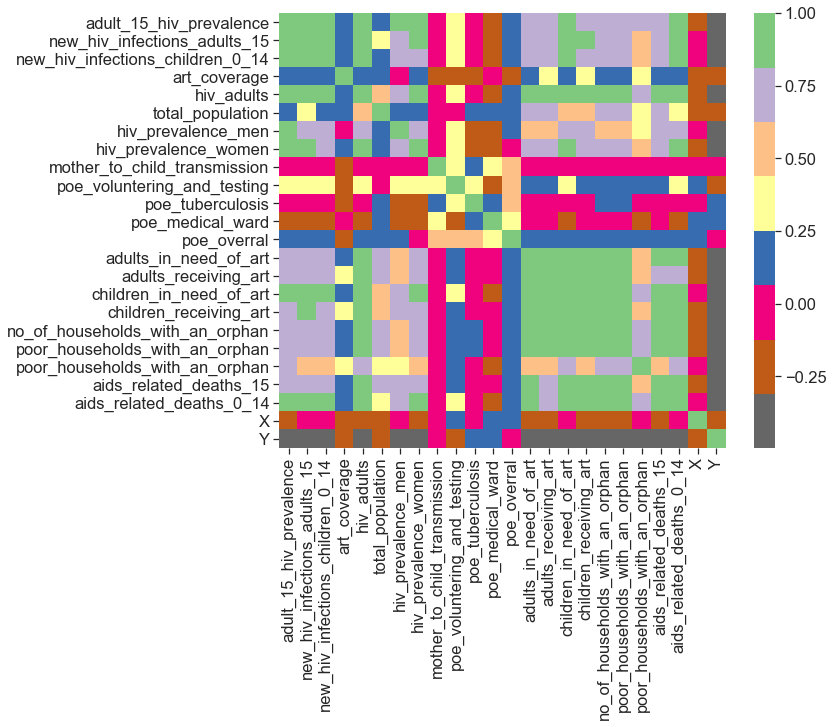

In [18]:
plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix,  xticklabels = corr_matrix.columns, yticklabels=corr_matrix.columns,
          fmt="g", cmap='Accent_r')  

- There are many between-predictor correlations. We will use PCA to transform them

Let's look at the features that are strongly correlated with the target variable 

In [19]:
corr_matrix['hiv_adults'].sort_values(ascending = False)

hiv_adults                          1.000000
children_in_need_of_art             0.990528
aids_related_deaths_0_14            0.964643
children_receiving_art              0.944611
adults_in_need_of_art               0.938667
new_hiv_infections_adults_15        0.923838
aids_related_deaths_15              0.906135
poor_households_with_an_orphan      0.905240
no_of_households_with_an_orphan     0.905145
adult_15_hiv_prevalence             0.895436
new_hiv_infections_children_0_14    0.880370
adults_receiving_art                0.877944
hiv_prevalence_women                0.817120
hiv_prevalence_men                  0.719874
poor_households_with_an_orphan      0.634271
total_population                    0.552124
poe_voluntering_and_testing         0.268354
poe_overral                         0.192556
art_coverage                        0.153999
poe_tuberculosis                   -0.013744
mother_to_child_transmission       -0.022233
X                                  -0.139176
poe_medica

# Pair Plots

Let's look at the pair-plot of few attributes

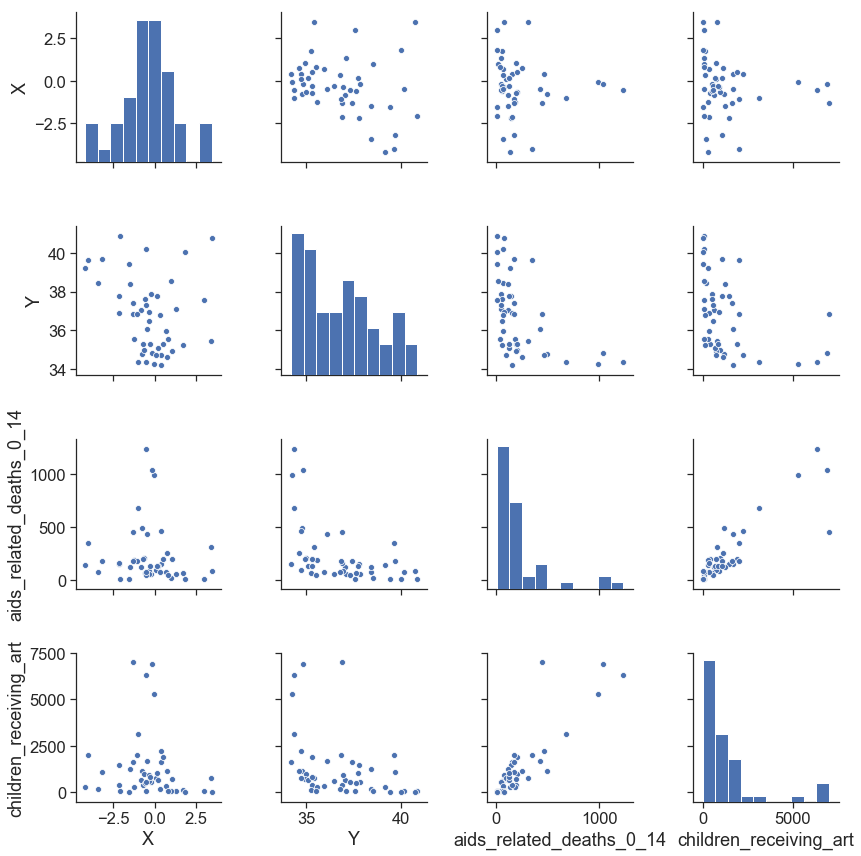

In [20]:
# List few attributes
attrib_list = ['X','Y', 'aids_related_deaths_0_14', 'children_receiving_art']

# make pairplot
sns.pairplot(data = df, vars = attrib_list, height = 3)

## Distribution of the target variable

Text(0.5,0,'HIV Adults')

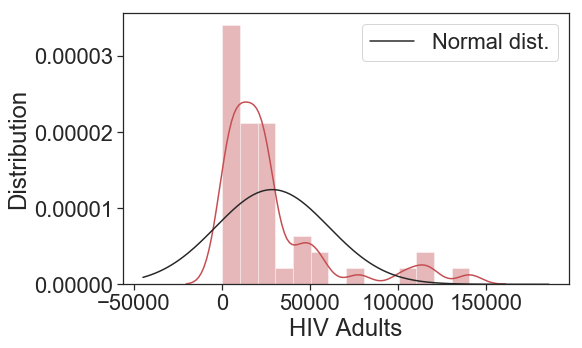

In [21]:
from scipy import stats
from scipy.stats import norm

# Set figure size
fig = plt.figure(figsize = (8,5))

# Set font scale and style
sns.set(font_scale = 2)
sns.set_style('ticks')

# Distribution of the HIV in adults
sns.distplot(df.hiv_adults, fit = norm, color = 'r')
# Legend and labels
plt.legend(['Normal dist.'],loc='best')
plt.ylabel('Distribution')
plt.xlabel('HIV Adults')

- The target variable is highly skewed. It is preferable for linear model to work with normally distributed data.  Therefore, it is expedient to tranform the target variable to a normally distributed one by log transformation.

## Logarithm transformation of target variable

Text(0.5,0,'HIV in Adults')

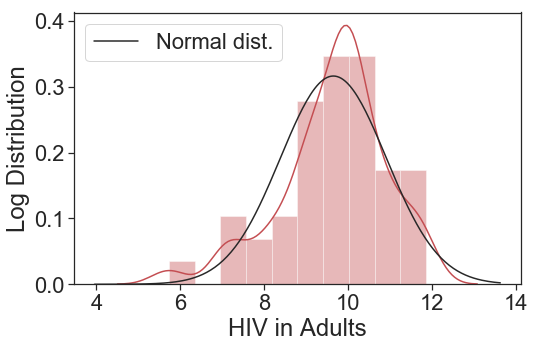

In [22]:
# Create a new column log_hiv_adults and apply log(x) to all elements of the column
df['hiv_adults'] = np.log(df['hiv_adults'])

# Set figure size
fig = plt.figure(figsize = (8,5))

# Distribution of the HIV in adults
sns.distplot(df['hiv_adults'],  fit = norm, color = 'r')

# Legend and labels
plt.legend(['Normal dist.'],loc='best')
plt.ylabel('Log Distribution')
plt.xlabel('HIV in Adults')

- Now we have a target function that is close  to a normal distribution.

# Prepare the Data for Machine Learning Algorithms

In [23]:
# Feature matrix
X = df.drop('hiv_adults', axis = 1) 

# The target variable
y = df['hiv_adults']

## Create  a Test Set

In [24]:
# import train test split library
from sklearn.model_selection import train_test_split

In [25]:
# Create a 20% test set and 80% training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [26]:
print('Training  set size:', X_train.shape)
print('Test set size:', X_test.shape)
print('Training target variable size', y_train.shape)
print('Test target variable size', y_test.shape)

Training  set size: (37, 23)
Test set size: (10, 23)
Training target variable size (37,)
Test target variable size (10,)


## Data Preprocessing 

In [27]:
# Libraries for preprocessing data
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.pipeline import Pipeline

In [28]:
# Build a pipeline of Imputer and StandardScaler
num_pipeline = Pipeline([('imputer', Imputer(strategy = 'median')), ('scaler', StandardScaler())])

# Fit transform the training set
X_train_prepared = num_pipeline.fit_transform(X_train)

# Only transform the test set
X_test_prepared = num_pipeline.transform(X_test)

In [29]:
# Convert the target variable to arrays 
y_train_label = y_train.values
y_test_label = y_test.values

In [30]:
print('Training size after preprocessing:', X_train_prepared.shape)
print('Test size after preprocessing:', X_test_prepared.shape)
print('Target training size after preprocessing:', y_train_label.shape)
print('Target test size after preprocessing:', y_test_label.shape)

Training size after preprocessing: (37, 23)
Test size after preprocessing: (10, 23)
Target training size after preprocessing: (37,)
Target test size after preprocessing: (10,)


## Principal Component Analysis (PCA)

In [31]:
from sklearn.decomposition import PCA, KernelPCA

We will use PCA to transform all the features to an orthogonal uncorrelated space.

In [32]:
# instantiate the PCA class
pca = PCA()
# fit transform the training set
X_train_pca = pca.fit_transform(X_train_prepared)
# only transform the training set
X_test_pca = pca.transform(X_test_prepared)

In [33]:
# shape of the transformed feature matrix
X_train_pca.shape

(37, 23)

Let's convert the numpy array into pandas dataframe with new column names

In [34]:
X_train_pca_df = pd.DataFrame(X_train_pca)
X_train_pca_df.columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
                          'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23']

Let's look at the pair plot of few principal components

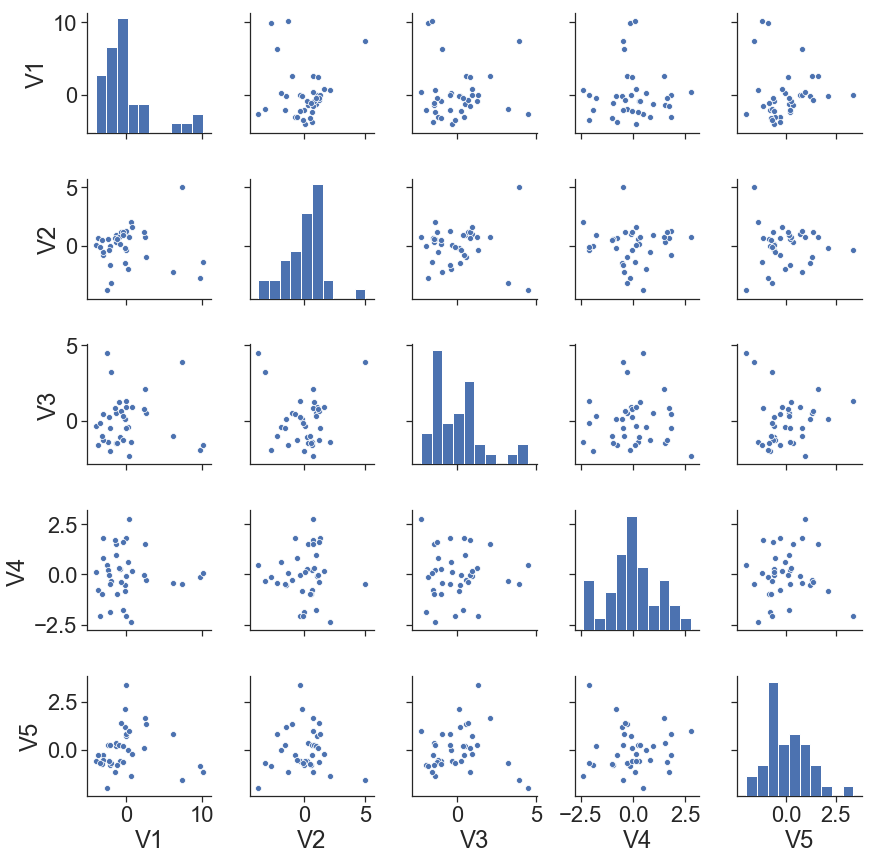

In [35]:
sns.pairplot(X_train_pca_df, vars = ['V1', 'V2', 'V3', 'V4', 'V5'])

- Indeed, we can see that the strong linear dependence in the original feature space has disappeared

Let's look at the correlation matrix in the transformed feature space

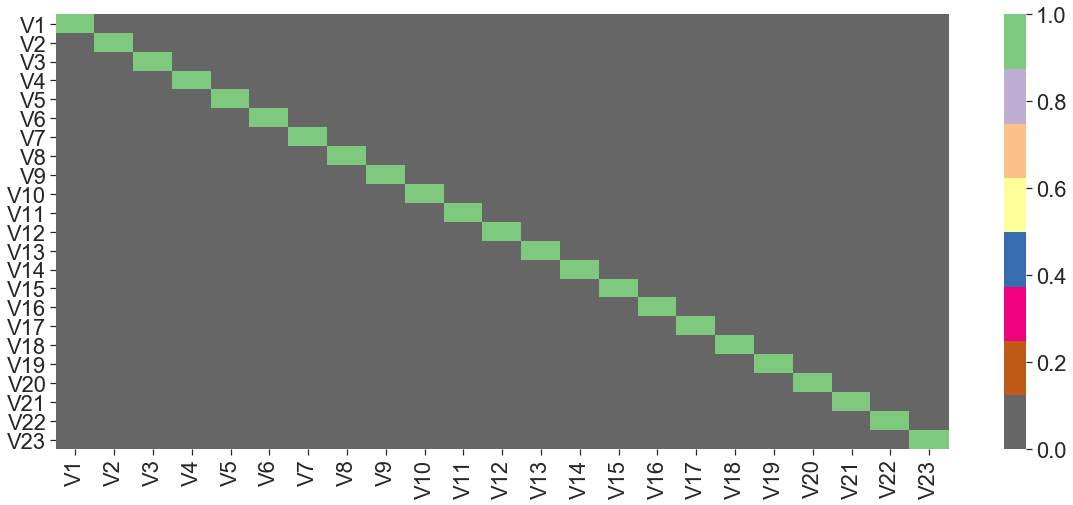

In [36]:
plt.figure(figsize = (20,8))
pca_corr = X_train_pca_df.corr()
sns.heatmap(pca_corr,  xticklabels = pca_corr.columns, yticklabels=pca_corr.columns,
          fmt="g", cmap='Accent_r')  

We do not have any strong between-predictor correlation in the transformed feature space

# Machine Learning Algorithms

In [37]:
# Ignore deprecated warning
import warnings
warnings.filterwarnings("ignore")

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Cross-validation
from sklearn.model_selection import cross_val_score, cross_val_predict
# Performance Metric
from sklearn.metrics import mean_squared_error, mean_absolute_error

Let's define the test prediction function

In [38]:
def Test_prediction(model, n_training_samples, n_training_label, n_test_samples, n_test_label):

    model.fit(n_training_samples, n_training_label)
    test_pred = model.predict(n_test_samples)
    RMSE_score = mean_squared_error(n_test_label, test_pred)
    
    return print('Test RMSE:', RMSE_score), test_pred

#  Model selection by cross-validation

We will train different models and select the ones with the lowest mean squared error

In [39]:
models = []

models.append(('lin_reg',  LinearRegression()))
models.append(('rig_reg',  Ridge()))
models.append(('svr_reg',  SVR()))
models.append(('forest_reg',  RandomForestRegressor(random_state = 42)))
models.append(('xgb_reg',  xgb.XGBRegressor()))

names = []
rmse_scores = []

for name, model in models:
    score = cross_val_score(model, X_train_pca, y_train_label, cv = 10, scoring = 'neg_mean_squared_error')
    RMSE_score = np.sqrt(-score)
    names.append(name)
    rmse_scores.append(RMSE_score)
    print('%s RMSE: %f (%f)'%(name, RMSE_score.mean(), RMSE_score.std()))

lin_reg RMSE: 0.809971 (0.377375)
rig_reg RMSE: 0.724576 (0.413419)
svr_reg RMSE: 0.715279 (0.414709)
forest_reg RMSE: 0.484934 (0.340528)
xgb_reg RMSE: 0.390377 (0.259524)


Below we show the box plot of model perfomance on the cross-validation set

Text(0,0.5,'Cross validation RMSE')

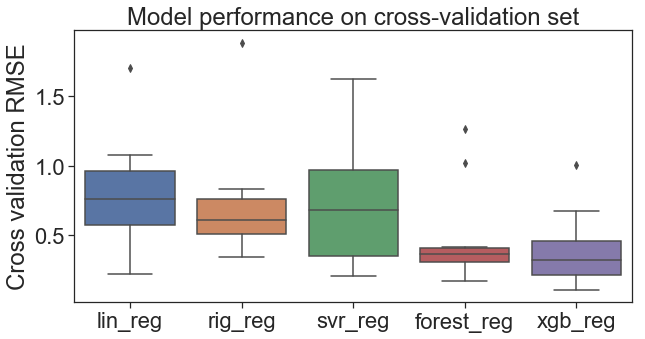

In [40]:
# Set figure size
plt.figure(figsize = (10,5))

# Display box plots
sns.boxplot(x = names, y = rmse_scores)

plt.title('Model performance on cross-validation set')
plt.ylabel('Cross validation RMSE')

- We can see that XGBoost and Random forest regressors have the lowest RMSE. We will therefore pick these two models for optimizaion  by tuning their hyperparameters

#  Hyperparameter Tuning

Having selected the best models as XGBoost and Random forest regressors, we will now optimize their them by tuning the hyperparameters

In [41]:
# Import grid and randomize search
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

### 1.  Random forest

In [42]:
params = {'n_estimators': [3, 5, 10, 30, 50],'max_features': ['auto', 'sqrt', 'log2', None],
          'max_depth': range(1,10,1),'min_samples_split': range(2,10,1),
          'min_samples_leaf': range(1,10,2),'bootstrap': [True, False]}
          
               
rf =  RandomForestRegressor(random_state = 42)
                         
rsearch_rf = RandomizedSearchCV(estimator = rf, param_distributions = params, 
                                  scoring = 'neg_mean_absolute_error', cv = 10, n_jobs = -1, 
                                  random_state = 42, verbose = 1)  
                                                        
rsearch_rf.fit(X_train_pca, y_train_label)
print('\n')
print('Best RMSE:', -rsearch_rf.best_score_) 
print('Best hyperparameters:', rsearch_rf.best_params_) 

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Best RMSE: 0.344939606053
Best hyperparameters: {'n_estimators': 30, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 8, 'bootstrap': False}


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.1s finished


### 2.  XGBoost

In [43]:
import xgboost as xgb

xgb =  xgb.XGBRegressor(objective = 'reg:linear')
                         
params = {'max_depth': range(1,10,2), 'min_child_weight': range(1,6,2),'gamma':[i/100 for i in range(0,6)],
         'subsample':[i/10 for i in range(5,9)],'colsample_bytree': [i/10 for i in range(5,9)],
         'learning_rate': [0.01, 0.02, 0.05, 0.1], 'n_estimators': [10000,20000,30000,50000]}
              
rsearch_xgb = RandomizedSearchCV(estimator = xgb, param_distributions = params, 
                                  scoring = 'neg_mean_absolute_error', cv = 10, n_jobs = -1, 
                                  random_state = 42, verbose = 1)  
                                                        
rsearch_xgb.fit(X_train_pca, y_train_label)
print('\n')
print('Best RMSE:', -rsearch_xgb.best_score_) 
print('Best hyperparameters:', rsearch_xgb.best_params_) 

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   42.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished




Best RMSE: 0.333904918597
Best hyperparameters: {'subsample': 0.5, 'n_estimators': 50000, 'min_child_weight': 1, 'max_depth': 9, 'learning_rate': 0.02, 'gamma': 0.0, 'colsample_bytree': 0.7}


## Feature Importances

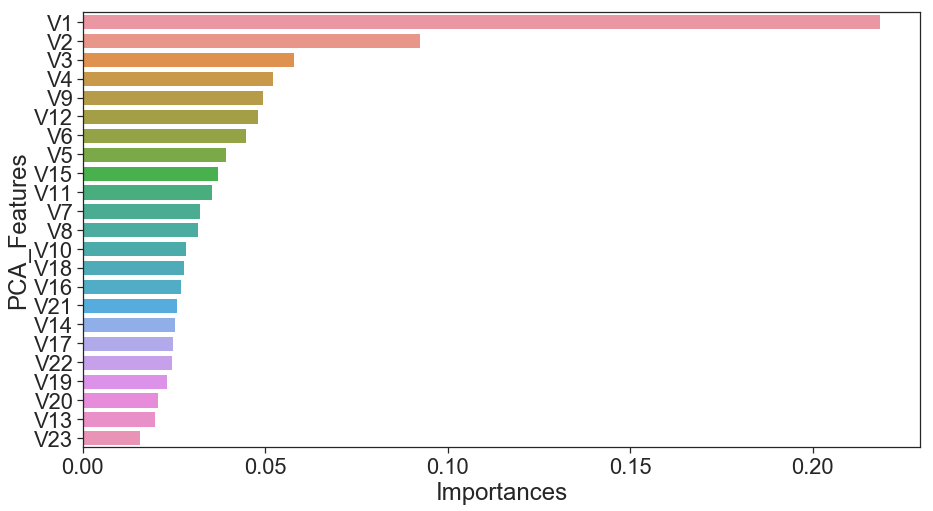

In [44]:
importances = rsearch_xgb.best_estimator_.feature_importances_
pca_features = X_train_pca_df.columns
importances_df =pd.DataFrame({'PCA_Features': pca_features, 
                              'Importances': importances}).sort_values('Importances', ascending=False)
plt.figure(figsize = (15,8))
sns.barplot(data = importances_df, y = importances_df['PCA_Features'], x = importances_df['Importances'])

- The PCA feature importance is consistent with the explained variance ratio. The principal component (PC) with the highest variance has the highest importance

# Prediction on the Test Set

### 1. Random forest

In [45]:
# Random forest test prediction
model_rf = rsearch_rf.best_estimator_
rf_prediction = Test_prediction(model_rf, X_train_pca, y_train_label, X_test_pca, y_test_label)
rf_prediction[0]

Test RMSE: 0.372162790346


### 2. XGBoost

In [46]:
# XGBoost test prediction
model_xgb = rsearch_xgb.best_estimator_
xgb_prediction = Test_prediction(model_xgb, X_train_pca, y_train_label, X_test_pca, y_test_label)
xgb_prediction[0]

Test RMSE: 0.15766341729
